In [ ]:
"""

The project I am working on is a digit recognition system using the MNIST dataset. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images.  

In my project, I first load the MNIST dataset and normalize the pixel values to be between 0 and 1. I then flatten the images for use with certain models. I start by benchmarking the performance of two traditional machine learning models: Random Forest and Logistic Regression. These models serve as a baseline for the performance of the more complex models that follow.  

Next, I implement a simple Neural Network (NN) with two hidden layers. This model is expected to perform better than the traditional models due to the ability of NNs to learn complex patterns and their suitability for image data.  

After that, I implement a Convolutional Neural Network (CNN). CNNs are specifically designed for processing grid-like data, such as images. They are able to capture local patterns in the input data through the use of convolutional layers. In my CNN, I use two convolutional layers, each followed by a max pooling layer. The convolutional layers learn local patterns in different regions of the input, while the max pooling layers reduce the spatial dimensions of the input, making the model more computationally efficient. The use of multiple convolutional layers allows the model to learn more complex patterns.  

The CNN is expected to perform better than the simple NN due to its ability to take advantage of the spatial structure of the data. The convolutional layers can learn local patterns in different regions of the image, and these patterns can then be combined to detect larger patterns. This makes CNNs particularly effective for image recognition tasks.  

Finally, I use data augmentation to artificially increase the size of the training dataset. This is done by applying random transformations to the images, such as rotations and shifts. This helps to make the model more robust to variations in the input data and can help to improve performance, especially when the amount of training data is limited.  

In summary, this project demonstrates the process of developing a digit recognition system using various machine learning models, with a focus on neural networks and specifically convolutional neural networks. The use of CNNs and data augmentation is justified by their effectiveness for image recognition tasks and their ability to improve model performance.
"""

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Look at the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


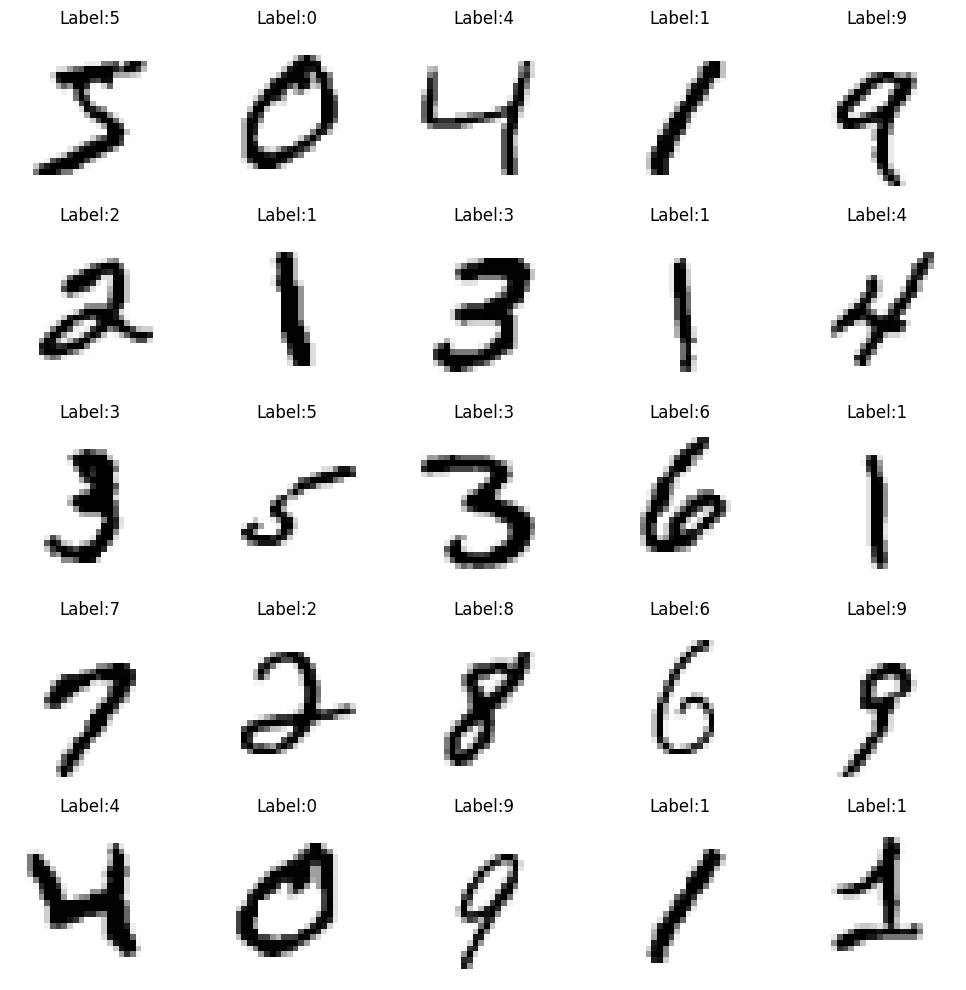

In [3]:
# Visualize some items in a grid
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_train[i], cmap="binary")
    ax.axis('off')
    ax.set_title(f"Label:{y_train[i]}")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the data
x_train = x_train.reshape(len(x_train), -1)

In [9]:
# Benchmark model: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
x_test = x_test.reshape(len(x_test), -1)
y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9704


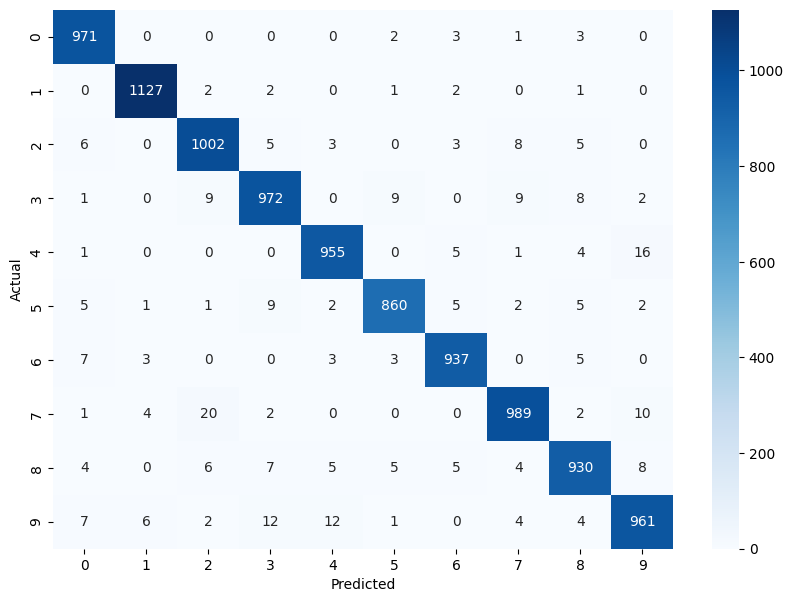

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Benchmark model: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_train, y_train)

# Evaluate the model
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9262


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Convert to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Create the model
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Train the model
model.fit(x_train, y_train_cat, epochs=30, batch_size=200, validation_data=(x_test, y_test_cat), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_cat)

Epoch 1/30
300/300 - 3s - loss: 0.3770 - accuracy: 0.8958 - val_loss: 0.1794 - val_accuracy: 0.9461 - 3s/epoch - 9ms/step
Epoch 2/30
300/300 - 1s - loss: 0.1481 - accuracy: 0.9560 - val_loss: 0.1235 - val_accuracy: 0.9606 - 820ms/epoch - 3ms/step
Epoch 3/30
300/300 - 1s - loss: 0.1004 - accuracy: 0.9706 - val_loss: 0.1027 - val_accuracy: 0.9688 - 770ms/epoch - 3ms/step
Epoch 4/30
300/300 - 1s - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.0839 - val_accuracy: 0.9733 - 780ms/epoch - 3ms/step
Epoch 5/30
300/300 - 1s - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0722 - val_accuracy: 0.9772 - 850ms/epoch - 3ms/step
Epoch 6/30
300/300 - 1s - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.0783 - val_accuracy: 0.9763 - 770ms/epoch - 3ms/step
Epoch 7/30
300/300 - 1s - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0788 - val_accuracy: 0.9765 - 760ms/epoch - 3ms/step
Epoch 8/30
300/300 - 1s - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0717 - val_accuracy: 0.9788 - 820ms/epoch - 3ms/step
Epo

In [15]:
print(f"Accuracy: {accuracy:.4f}")
[a.shape for a in model.get_weights()]

Accuracy: 0.9795


[(784, 128), (128,), (128, 128), (128,), (128, 10), (10,)]

In [18]:
# Colvolutional Neural Network
from keras.layers import Conv2D, MaxPooling2D, Reshape

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Create the model
model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [19]:
# Train the model
model.fit(x_train, y_train_cat, epochs=50, batch_size=200, validation_data=(x_test, y_test_cat), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_cat)

Epoch 1/50
300/300 - 29s - loss: 0.2263 - accuracy: 0.9359 - val_loss: 0.0539 - val_accuracy: 0.9821 - 29s/epoch - 98ms/step
Epoch 2/50
300/300 - 25s - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0398 - val_accuracy: 0.9879 - 25s/epoch - 83ms/step
Epoch 3/50
300/300 - 25s - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0320 - val_accuracy: 0.9899 - 25s/epoch - 83ms/step
Epoch 4/50
300/300 - 25s - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0265 - val_accuracy: 0.9909 - 25s/epoch - 82ms/step
Epoch 5/50
300/300 - 25s - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0282 - val_accuracy: 0.9898 - 25s/epoch - 85ms/step
Epoch 6/50
300/300 - 26s - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0270 - val_accuracy: 0.9919 - 26s/epoch - 86ms/step
Epoch 7/50
300/300 - 25s - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0276 - val_accuracy: 0.9913 - 25s/epoch - 85ms/step
Epoch 8/50
300/300 - 30s - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0265 - val_accuracy: 0.9911 - 30s/epoch - 102ms/step

In [20]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9941


In [21]:
# Save the model
model.save('mnist_cnn.h5')

In [22]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

In [23]:
# Create the model
model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [24]:
# Train the model
model.fit(datagen.flow(x_train, y_train_cat, batch_size=200), epochs=30, validation_data=(x_test, y_test_cat), 
          verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_cat)

Epoch 1/30
300/300 - 32s - loss: 0.4343 - accuracy: 0.8637 - val_loss: 0.0714 - val_accuracy: 0.9793 - 32s/epoch - 106ms/step
Epoch 2/30
300/300 - 31s - loss: 0.1269 - accuracy: 0.9617 - val_loss: 0.0349 - val_accuracy: 0.9886 - 31s/epoch - 102ms/step
Epoch 3/30
300/300 - 33s - loss: 0.0894 - accuracy: 0.9730 - val_loss: 0.0298 - val_accuracy: 0.9900 - 33s/epoch - 109ms/step
Epoch 4/30
300/300 - 30s - loss: 0.0703 - accuracy: 0.9786 - val_loss: 0.0276 - val_accuracy: 0.9907 - 30s/epoch - 101ms/step
Epoch 5/30
300/300 - 29s - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0279 - val_accuracy: 0.9912 - 29s/epoch - 96ms/step
Epoch 6/30
300/300 - 28s - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0223 - val_accuracy: 0.9923 - 28s/epoch - 94ms/step
Epoch 7/30
300/300 - 30s - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0223 - val_accuracy: 0.9929 - 30s/epoch - 100ms/step
Epoch 8/30
300/300 - 30s - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0274 - val_accuracy: 0.9916 - 30s/epoch - 102ms

In [25]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9955


In [26]:
# Save the model
model.save('mnist_cnn_augmented.h5')

In [8]:
"""
Best accuracy score achieved on this dataset was 99,87% with Branching/Merging CNN + Homogeneous Vector Capsules model
Byerly, A., Kalganova, T., & Dear, I. (2021). No routing needed between capsules. Neurocomputing, 463, 545-553.
"""

'\nBest accuracy score achieved on this dataset was 99,87% with Branching/Merging CNN + Homogeneous Vector Capsules model\nByerly, A., Kalganova, T., & Dear, I. (2021). No routing needed between capsules. Neurocomputing, 463, 545-553.\n'

In [1]:
# Submission for Kaggle
import pandas as pd
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_reshaped = test.values.reshape(-1, 28, 28, 1) / 255.0
test_reshaped.shape

(28000, 28, 28, 1)

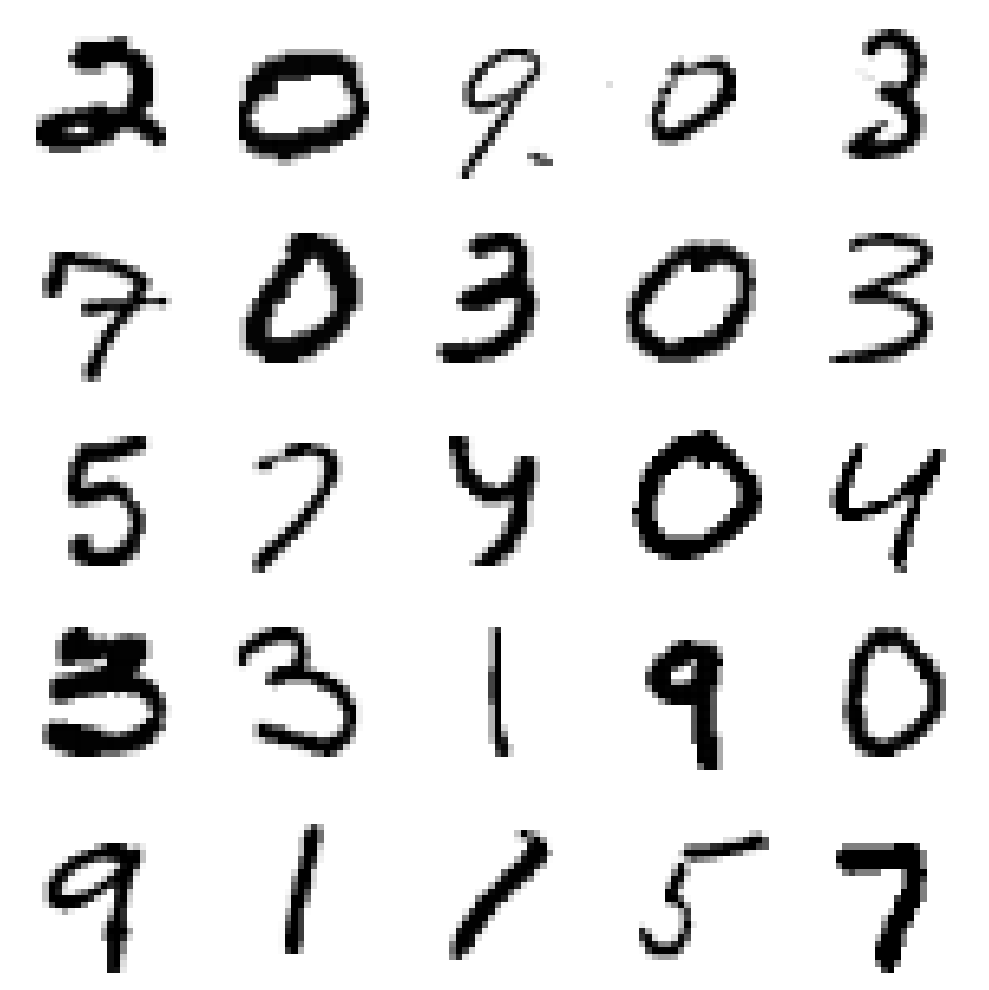

In [8]:
# visualize some of the test data
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(test_reshaped[i].reshape(28, 28), cmap="binary")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# predict the test data
# load the model
from keras.models import load_model

model = load_model('../ML/mnist_cnn_augmented.h5')
predictions = model.predict(test_reshaped)

875/875 [==============================] - 8s 9ms/step


In [13]:
# make the submission
import numpy as np
submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions)+1), 'Label': np.argmax(predictions, axis=1)})
submission.head(n=10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [16]:
len(submission) == len(test)

True

In [14]:
submission.to_csv('mnist_submission.csv', index=False)

In [ ]:
"""
I tested the model in a Kaggle competition with nearly 1,700 participants. The model achieved an accuracy of 99,67% 
which placed 53. place on the leaderboard.
AstroDave, Will Cukierski. (2012). Digit Recognizer. Kaggle. https://kaggle.com/competitions/digit-recognizer
"""